In [95]:
# Following lines are for Python 2.x to 3.xx compatibility
from __future__ import print_function
from __future__ import division 

In [96]:
#IMPORT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## Set a seed for the random number generator
np.random.seed(100)

Problem 2

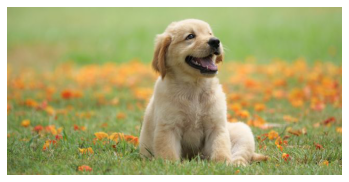

In [97]:
myRGB = mpimg.imread("./images/pup.jpg")

plt.axis('off')
plt.imshow(myRGB)
plt.show()

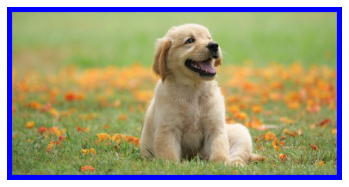

In [98]:
# Part A: Pad the image by 10 pixels of your liking on all sides.
bt = 10  # pad width
r_cons, g_cons, b_cons = [0, 0, 255] # color for pad: blue

r_, g_, b_ = myRGB[:, :, 0], myRGB[:, :, 1], myRGB[:, :, 2]

rb = np.pad(array=r_, pad_width=bt, mode='constant', constant_values=r_cons)
gb = np.pad(array=g_, pad_width=bt, mode='constant', constant_values=g_cons)
bb = np.pad(array=b_, pad_width=bt, mode='constant', constant_values=b_cons)
        
image_b = np.dstack(tup=(rb, gb, bb))

plt.axis('off')
plt.imshow(image_b)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


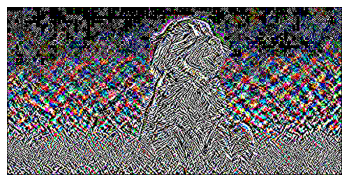

In [119]:
# Part B; perform an operation called convolution on the original image, using window 3x3 kernal

K=np.array([[1, 0, -1],[0, 0, 0],[-1, 0, 1]]) # 1st type of kernal
#K = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]]) #2nd type of kernal

img_h = myRGB.shape[0]
img_w = myRGB.shape[1]

ker_h = K.shape[0]
ker_w = K.shape[1]

h = ker_h//2
w = ker_w//2

myRGB_conv = np.zeros(myRGB.shape)

for i in range(h, img_h-h):
    for j in range(w, img_w-w):
        sum = 0
        
        for m in range(ker_h):
            for n in range(ker_w):
                sum = sum + K[m][n]*myRGB[i-h+m][j-w+n]
            
        myRGB_conv[i][j] = sum


plt.axis('off')
plt.imshow(myRGB_conv)
plt.show()

Problem 3

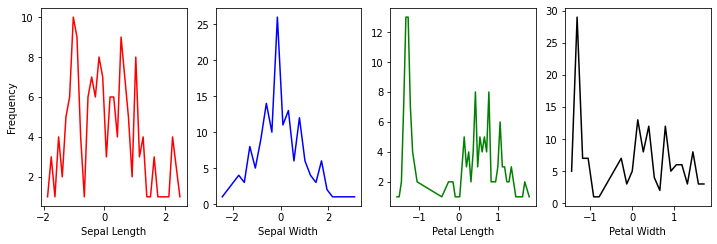

In [223]:
# Find the z-scoring (z  = (x - x_mean)/std)

from sklearn import datasets

iris = datasets.load_iris().data

iris_mean = np.mean(iris, axis=0)# finding means of each datatype, there are 4 types

#print(iris_mean)

iris_std = np.std(iris, axis=0) # finding the std for each type of data

#print(iris_std)

iris_z_score = np.divide(np.subtract(iris, iris_mean), iris_std) # calculating z score

#print(iris_z_score)

#finding frequencies of z scores
(uni_sl, c_sl) = np.unique(iris_z_score[:, 0], return_counts=True)
f_sl = np.asarray((uni_sl, c_sl)).T
(uni_sw, c_sw) = np.unique(iris_z_score[:, 1], return_counts=True)
f_sw = np.asarray((uni_sw, c_sw)).T
(uni_pl, c_pl) = np.unique(iris_z_score[:, 2], return_counts=True)
f_pl = np.asarray((uni_pl, c_pl)).T
(uni_pw, c_pw) = np.unique(iris_z_score[:, 3], return_counts=True)
f_pw = np.asarray((uni_pw, c_pw)).T

# ploting the z-scores vs the frequencies

plt.figure(figsize=(12, 8))
plt.subplot(241)
plt.plot(f_sl[:, 0], f_sl[:, 1], 'r' )
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')

plt.subplot(242)
plt.plot(f_sw[:, 0], f_sw[:, 1], 'b' )
plt.xlabel('Sepal Width')

plt.subplot(243)
plt.plot(f_pl[:, 0], f_pl[:, 1], 'g' )
plt.xlabel('Petal Length')

plt.subplot(244)
plt.plot(f_pw[:, 0], f_pw[:, 1], 'k' )
plt.xlabel('Petal Width')
plt.show()


Problem 4

[[0.         0.         0.01168736 0.         0.         0.
  0.         0.01168736 0.         0.04674946 0.         0.01168736
  0.         0.01168736 0.00862692 0.         0.01168736 0.
  0.         0.         0.         0.01168736 0.01168736 0.
  0.01168736 0.01168736 0.01168736 0.01168736 0.01168736 0.
  0.         0.         0.01168736 0.         0.         0.01168736
  0.         0.01168736 0.01168736 0.         0.01168736 0.
  0.01168736 0.         0.01168736 0.         0.         0.
  0.         0.00431346 0.01077071 0.01077071 0.02154142 0.
  0.01077071 0.01077071 0.03231213 0.         0.         0.
  0.01077071 0.         0.01077071 0.         0.         0.03231213
  0.01077071 0.         0.         0.         0.         0.
  0.         0.05385354 0.01077071 0.         0.         0.
  0.01077071 0.02154142 0.         0.01077071 0.         0.01077071
  0.         0.         0.         0.         0.         0.01077071
  0.         0.01077071 0.         0.01192544 0.05385354 0.


Text(0, 0.5, 'Frequency')

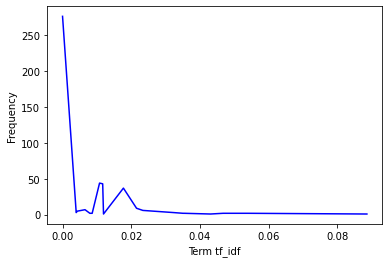

In [192]:
# the following code is from the class notes --------------------------------------------------
from sklearn.feature_extraction.text import CountVectorizer,ENGLISH_STOP_WORDS

vectorizer = CountVectorizer()

document1 = " I bought this game as a gift for my 8 year old daughter who loves games. I was expecting lots of gross foods--but I was surprised at the inappropriate cards--eyeball, human burger, blood salsa, and fresh brains. Those are not foods that typical people find in their refrigerators. We do not practice cannibalism. She was very upset when I suggested that we just take out those cards. I seriously wonder who thinks that those cards are appropriate for kids. The rest of the game is funny, but I wish I would have looked through the cards before I gave it to her."
document2 = "Absolutely love Taco vs burrito. I️ bought it as a kickstarter. I️ originally bought this game because my husband and I️ love to play games with friends but most of them are not targeted to children so I️ got this to add to our collection so we had options when our friends with kids came. I’m not gonna lie I️ did No have high expectations for this to be a game for adult but I️ was Sooooo wrong!!!!!! We have now played with several different groups of friends and it’s a hit!!!!! With adults it becomes a major strategy game. I️ have Now bought it as a Christmas present bc it was so well received!!!!"
document3 = " Unlike several of the reviewers here, I didn't purchase this originally for when kids are around. I bought it because of the reviews that said the adults all loved it too! I'm always on the lookout for games playable by 2 people and this was a great one. It's incredibly simple, but brings a lot of laughs with the competition and sabotage. I'm really glad I gave this game a chance."
doc_list = [document1, document2, document3]

bow = vectorizer.fit_transform(doc_list)
#print(type(bow))
#print ("Feature (terms) Names: \n",vectorizer.get_feature_names())

# Check the matrix
#print("Bag of words sparse matrix (data structure CSR-compressed sparse row):\n",bow, "\n To an array: \n", bow.toarray())

# Starting new code ----------------------------------------------------------------------------
# The print statements include were for double checking work and if needed for curiousity to see step by step results
doc_term = bow.toarray()
(row, col) = np.shape(doc_term) #(dim: row, col)

#print(doc_term)
doc_sum = np.sum(doc_term, axis=1, keepdims=True) # sum each row, keep as column vector (dim: row, 1)

#print(doc_sum)

doc_term_freq = np.divide(doc_term, doc_sum) # divide each row by sum of the row,  (row, col)/(row, 1)

#print(doc_term_freq[0, :])
#print(np.divide(doc_term[0, :], sum_d1))

term_count = np.count_nonzero(doc_term, axis=0) # count how many docs include each term (dim: 1, col)

#print(term_count)

idf = np.subtract(np.log(row), np.log(term_count)) # natural log of num of docs(row) - natural log of the term count

#print(idf)

tf_idf = np.multiply(np.reshape(doc_term_freq, (col, row)), np.reshape(idf, (col, 1))) # freq*idf dim result: (col, row)
tf_idf = tf_idf.T #swtich back to (row, col)

print(tf_idf)

# visual below of how the tf_idf looks based on the frequencies of each terms tf_idf
(uni, c) = np.unique(tf_idf, return_counts=True)
freq = np.asarray((uni, c))

plt.plot(freq[0, :], freq[1, :], 'b' )
plt.xlabel('Term tf_idf')
plt.ylabel('Frequency')
